In [ ]:
from fastai.vision.all import *
from fastai.vision.widgets import *
import PIL # para invertir las imagenes

learn_numbers = load_learner('numeros.pkl')
print("clases del learner:", learn_numbers.dls.vocab)

# para quitar la notacion cientifica
torch.set_printoptions(sci_mode=False)


clases del learner: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [ ]:
# # hice muchas pruebas con diferentes imagenes, pero para las ideas que quiero transmitir ya las he pasado a una carpeta
# btn_upload = widgets.FileUpload()
# btn_upload

In [ ]:
# im = PILImage.create(btn_upload.data[-1])
# im

In [ ]:
path = Path("imagenes ejercicio 2")
path.ls(file_exts = ".JPG")

(#9) [Path('imagenes ejercicio 2/9_2.JPG'),Path('imagenes ejercicio 2/1.JPG'),Path('imagenes ejercicio 2/5.JPG'),Path('imagenes ejercicio 2/4.JPG'),Path('imagenes ejercicio 2/51.JPG'),Path('imagenes ejercicio 2/41.JPG'),Path('imagenes ejercicio 2/3.JPG'),Path('imagenes ejercicio 2/2-3.JPG'),Path('imagenes ejercicio 2/2-2.JPG')]

In [ ]:
numeros = [PILImage.create(o) for o in path.ls(file_exts = ".JPG")]

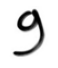

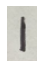

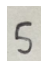

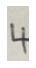

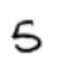

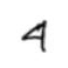

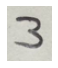

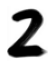

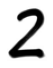

In [ ]:
for i in numeros:
    show_image(i.to_thumb(50,50))

In [ ]:
# paso la imagen a un tensor, inviertiendo los colores para que quede en letra negra con fondo blanco
im = tensor(PIL.ImageOps.invert(numeros[0])) 

In [ ]:
# Y ya hago la inferencia
pred = learn_numbers.predict(im)

print("Predicción:", pred[0],
    #"\nindex:", pred[1], # este dato me da igual
    "\nprobabilidades de cada clase:\n", pred[2])


Predicción: 9 
probabilidades de cada clase:
 TensorImage([    0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,
            0.0000,     0.0000,     0.0000,     1.0000])


Con los 2s sufre un monton, no los saca bien:

In [ ]:
im = tensor(PIL.ImageOps.invert(numeros[-2])) 
pred = learn_numbers.predict(im)
print("Predicción:", pred[0],
    "\nprobabilidades de cada clase:\n", pred[2])

im = tensor(PIL.ImageOps.invert(numeros[-1])) 
pred = learn_numbers.predict(im)
print("Predicción:", pred[0],
    "\nprobabilidades de cada clase:\n", pred[2])


Predicción: 9 
probabilidades de cada clase:
 TensorImage([    0.0000,     0.2188,     0.1801,     0.0000,     0.0455,     0.0000,
            0.0022,     0.0231,     0.0000,     0.5302])


Predicción: 1 
probabilidades de cada clase:
 TensorImage([    0.0000,     0.8795,     0.0752,     0.0000,     0.0000,     0.0000,
            0.0000,     0.0452,     0.0000,     0.0001])


A ver con el modelo de data augmentation:

In [ ]:
learn_numbers = load_learner('numeros augmented.pkl')


im = tensor(PIL.ImageOps.invert(numeros[0])) 
pred = learn_numbers.predict(im)
print("Predicción:", pred[0],
    "\nprobabilidades de cada clase:\n", pred[2])


im = tensor(PIL.ImageOps.invert(numeros[-2])) 
pred = learn_numbers.predict(im)
print("Predicción:", pred[0],
    "\nprobabilidades de cada clase:\n", pred[2])

im = tensor(PIL.ImageOps.invert(numeros[-1])) 
pred = learn_numbers.predict(im)
print("Predicción:", pred[0],
    "\nprobabilidades de cada clase:\n", pred[2])


Predicción: 9 
probabilidades de cada clase:
 TensorImage([    0.0002,     0.0000,     0.0003,     0.0034,     0.0000,     0.0007,
            0.0002,     0.0000,     0.0010,     0.9942])


Predicción: 2 
probabilidades de cada clase:
 TensorImage([    0.0000,     0.0000,     1.0000,     0.0000,     0.0000,     0.0000,
            0.0000,     0.0000,     0.0000,     0.0000])


Predicción: 2 
probabilidades de cada clase:
 TensorImage([    0.0000,     0.0001,     0.9999,     0.0000,     0.0000,     0.0000,
            0.0000,     0.0000,     0.0000,     0.0000])


Lo clava!
Pues nada, me quedo con el modelo aumentado